# Part 1: SLR

Consider a Simple Linear Regression model of the form:

$$
y = \alpha + \beta x + \epsilon
$$

where:
- $y$ is the dependent variable,
- $x$ is the independent variable,
- $\epsilon$ is the error term
- $\alpha$ and $\beta$ are parameters to be estimated

Using your brain and a pen, prove that :

$\hat{\beta} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$

$\hat{\alpha} = \bar{y} - \hat{\beta} \bar{x}$

hint : start by $\hat{\alpha}$

# Part 2: MLR

Consider a Muliple Linear Regression model of the form:
$$
y = \beta X + \epsilon
$$

1. What is $\beta$ ?
2. What is $X$ ?
3. What are the dimensions of $X$ & $\beta$
4. Prove that $\hat{\beta} = (X^T X)^{-1} X^T y$
5. What are the dimensions of each element of $\hat{\beta}$
6. Under what conditions $X^T X$ is invertible ?

# Part 3 : Calculate Simple Linear Regression Coefficients


Given the following dataset:
   \( x \) | \( y \) |
 |---------|---------|
 | 1       | 3       |
 | 2       | 5       |
 | 3       | 4       |
 | 4       | 7       |
 | 5       | 6       |

1. Calculate the intercept and slope for a Simple Linear Regression model.
2. Draw the regression line on paper, and then plot it by coding. Compare
4. Calculate the residuals on paper and then by coding. Compare
5. Calculate the SSR on paper and then by coding. Compare
6. Calculate the R_squared on paper and then by coding. Analyse


##### R_squared (Coefficient of Determination)

$R^2$, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It provides insight into the goodness of fit of a model, indicating how well the independent variables explain the variability of the dependent variable.

The $R^2$ value ranges from 0 to 1, where:
- $R^2 = 1$ indicates that the regression model perfectly fits the data.
- $R^2 = 0$ indicates that the model does not explain any of the variability of the response data around its mean.

$R^2$ is calculated using the formula:
$R^2 = 1 - \frac{\text{SSR}}{\text{SST}}$, 

where :
- SSR (Sum of Squared Residuals) is :
  $\text{SSR} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
- SST (Total Sum of Squares) is :
  $\text{SST} = \sum_{i=1}^{n} (y_i - \bar{y})^2$

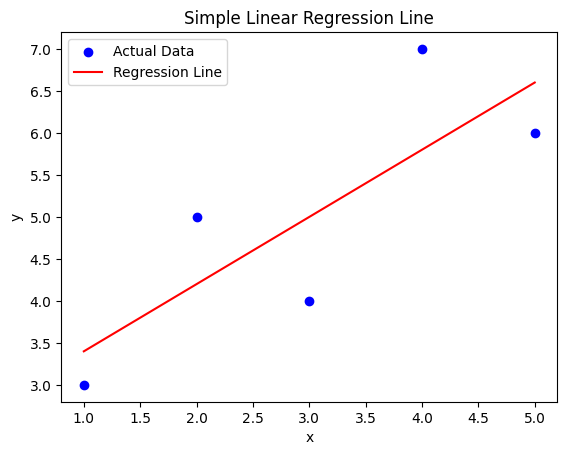

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given dataset
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 4, 7, 6])

# Compute regression coefficients
beta_hat = 0.8
alpha_hat = 2.6

# Compute predicted values
y_pred = alpha_hat + beta_hat * x

# Plot data points
plt.scatter(x, y, color='blue', label='Actual Data')

# Plot regression line
plt.plot(x, y_pred, color='red', label='Regression Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Simple Linear Regression Line')
plt.show()


In [2]:
residuals = y - y_pred
print("Residuals:", residuals)


Residuals: [-0.4  0.8 -1.   1.2 -0.6]


In [3]:
SSR = np.sum(residuals ** 2)
print("SSR:", SSR)


SSR: 3.599999999999998


In [4]:
SST = np.sum((y - np.mean(y)) ** 2)
R_squared = 1 - (SSR / SST)
print("R_squared:", R_squared)


R_squared: 0.6400000000000002


## Part 4. Coding task: Regression to the California Housing dataset. 

The goal of this task is to predict house prices based on median income using a linear regression model.

### **Tasks:**
1) Divide the dataset into training and testing sets.
2) Fit a linear regression model using the training data.
3) Make predictions on the test data
4) Evaluate the model’s performance using appropriate metrics, such as Mean Squared Error (MSE) and R² score.
5) Plot the regression line on a scatter plot of the actual data to visually assess the model’s fit.
6) Plot the residuals distribution
7) Repeat those steps by using more features

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
# Add the target variable (house prices)
df['Target'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
X = df[['MedInc']]  # Feature (Median Income)
y = df['Target']    # Target (House Prices)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

# Get the learned parameters
intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")


Intercept: 0.4446
Slope: 0.4193


In [9]:
y_pred = model.predict(X_test)


In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 0.7091
R-squared (R²): 0.4589


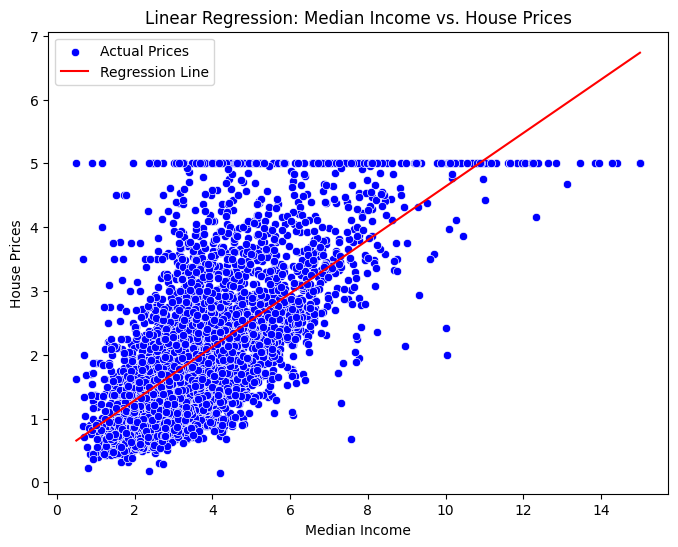

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['MedInc'], y=y_test, color='blue', label='Actual Prices')
sns.lineplot(x=X_test['MedInc'], y=y_pred, color='red', label='Regression Line')

plt.xlabel('Median Income')
plt.ylabel('House Prices')
plt.title('Linear Regression: Median Income vs. House Prices')
plt.legend()
plt.show()


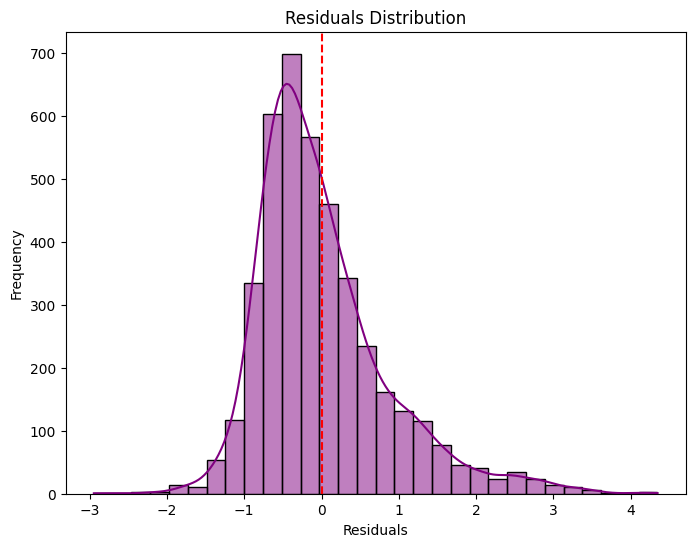

In [12]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()


In [13]:
# Select multiple features
X_multi = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]

# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Train the model
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Make predictions
y_pred_multi = model_multi.predict(X_test_multi)

# Evaluate the model
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print(f"Multivariable Model - Mean Squared Error (MSE): {mse_multi:.4f}")
print(f"Multivariable Model - R-squared (R²): {r2_multi:.4f}")


Multivariable Model - Mean Squared Error (MSE): 0.5559
Multivariable Model - R-squared (R²): 0.5758
